In [ ]:
# imports
import scipy
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from tqdm import tqdm
import concurrent.futures

from plot_volume import plot_volume

%matplotlib ipympl
%load_ext autoreload
%autoreload 2

In [2]:
plt.close('all')

In [3]:
# load dataset
raw_data_path = '../dataset/data_raw/'
test_data_path = '../dataset/test_raw/'

#raw_data_path = test_data_path

file_num = 5
files = [f for f in os.listdir(raw_data_path)]
mat = scipy.io.loadmat(raw_data_path + files[file_num])

In [4]:
empty_meas = scipy.io.loadmat(test_data_path + "empty.mat")
full_meas = scipy.io.loadmat(test_data_path + "full.mat")

In [7]:
# find c duplicate positions
arr = mat["C"]

# Find the unique elements and their counts
unique_elements, counts = np.unique(arr, return_counts=True)

# Find the indices where counts are greater than 1 (repeating numbers)
repeating_indices = np.where(counts > 1)[0]

# Get the repeating numbers
repeating_numbers = unique_elements[repeating_indices]

repeating = []
# Print repeating numbers and their indices
for num in repeating_numbers:
    indices = np.where(arr == num)[0]
    repeating.append(indices)

for r in repeating:
    print(str(r[1]), end=',')

643,613,519,751,891,767,522,874,969,890,766,523,583,873,642,871,644,985,843,645,518,553,646,721,860,271,844,811,673,552,765,968,842,752,861,857,631,889,781,549,521,394,614,753,703,877,827,859,921,737,733,797,967,763,984,489,972,579,878,393,691,858,735,615,856,981,938,764,955,813,875,892,361,876,363,937,812,676,705,826,734,661,888,364,796,616,893,675,674,241,983,611,704,907,954,908,769,754,964,814,973,829,971,783,887,828,903,488,782,707,584,272,894,551,581,639,459,672,641,886,392,722,331,770,548,966,520,950,952,391,273,798,987,924,925,647,516,922,395,923,487,458,845,936,847,723,799,601,933,906,211,784,396,800,702,895,457,585,677,965,905,514,846,935,795,554,524,862,333,427,902,825,988,901,738,429,732,332,608,848,547,855,942,980,970,454,919,963,632,492,399,941,301,801,334,491,863,610,550,242,423,365,762,693,580,426,739,662,456,486,794,274,577,849,555,932,484,793,640,455,367,638,824,181,485,243,864,755,671,708,525,490,949,303,817,607,816,302,940,740,663,669,633,957,911,546,823,453,832,918,

In [ ]:
repeating_indexes = [643,875,613,519,874,642,518,751,612,721,845,644,891,844,395,645,583,646,673,905,579,969,609,968,549,736,965,582,935,271,522,517,691,873,766,767,890,703,394,611,876,843,754,753,841,521,706,631,520,641,515,737,752,814,614,861,811,967,877,523,815,552,241,860,365,733,781,553,676,639,548,735,878,581,661,705,364,516,938,610,675,904,871,722,966,842,813,489,674,578,921,615,755,488,872,939,425,984,580,784,704,765,937,551,723,640,951,734,672,936,908,985,812,550,934,272,396,455,859,892,783,906,768,907,273,785,889,707,608,846,983,830,769,879,363,393,763,981,616,724,797,782,827,397,334,301,970,458,487,274,796,964,485,909,211,893,826,770,857,831,702,764,829,331,971,972,847,361,335,584,982,856,547,954,953,457,692,858,333,398,459,952,920,738,362,800,304,486,828,424,456,903,922,799,242,426,427,428,303,848,894,923,798,332,732,677,955,302,888,392,862,924,577,671,693,366,601,638,181,514,739,585,795,816,725,950,305,243,490,801,973,647,454,940,986,886,887,151,275,391,662,546,933,771,554,429,825,632,545,987,941,491,367,863,902,701,925,399,817,849,524,669,762,895,670,607,694,794,901,740,586,708,793,756,786,244,910,855,980,919,942,963,880,423,484,212,492,988,663,576,832,555,818,368,336,864,824,731,460,956,932,911,700,787,633,575,823,709,699,525,213,453,881,949,757,931,957,337,833,678,461,182,918,422,571,943,513,885,637,695,664,606,854,306,912,556,802,962,926,430,819,788,730,741,761,245,493,602,544,989,668,121,617,726,974,916,792,850,865,369,152,648,276,421,772,917,896,400,483,979,214,710,958,462,338,834,853,882,605,634,729,758,526,961,183,679,452,948,927,307,803,431,913,884,541,512,636,665,822,698,603,574,851,789,727,975,760,946,883,759,511,635,572,543,820,791,944,915,667,696,897,773,277,153,401,451,649,947,308,928,804,432,482,184,978,680,835,852,728,339,604,976,959,91,463,587,215,711,866,370,246,742,122,821,494,990,618,573,790,542,697,945,914,666,774,402,898,278,481,977,154,650,371,867,123,619,991,495,743,247,805,309,929,433,185,681,61,557,960,216,464,712,340,836,92,588]
mat['C'] = np.delete(mat['C'], repeating_indexes)
empty_meas['C'] = np.delete(empty_meas['C'], repeating_indexes)
full_meas['C'] = np.delete(full_meas['C'], repeating_indexes)

In [8]:
len(empty_meas['C'])

496

In [9]:
# List of numbers from 0 to 991
all_numbers = list(range(992))

# Example specified list of numbers (can be replaced with your actual list)
specified_numbers = repeating_indexes  # Add the numbers you want to exclude here

# Convert specified_numbers to a set for efficient removal
specified_set = set(specified_numbers)

# Generate the list of remaining numbers
remaining_numbers = [num for num in all_numbers if num not in specified_set]

# Print the result
print(remaining_numbers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 248, 2

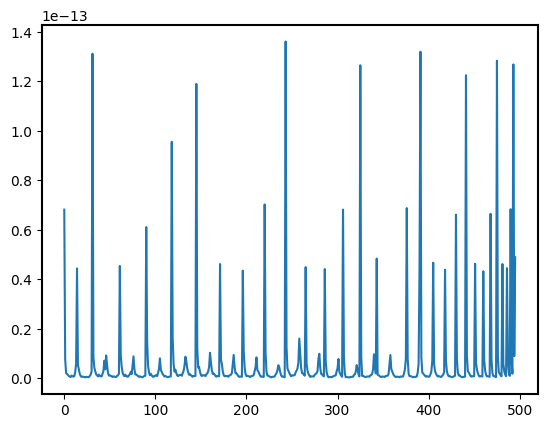

In [10]:
# plot C
plt.figure()
plt.plot(mat['C'])
plt.show()

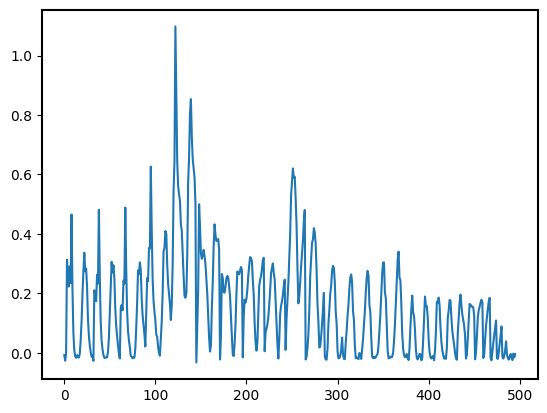

In [11]:
# plot C normalized
plt.figure()
plt.plot((mat['C'] - empty_meas['C']) / (full_meas['C'] - empty_meas['C']))
plt.show()

In [12]:
# find indexes of sensor
sensor = np.where(mat["eps_map"] == 2)

In [13]:
mat["eps_map"][sensor] = 1
mat["eps_map"] = mat["eps_map"][2:-2, 2:-2, 7:-7]
print(mat["eps_map"].shape)

(60, 60, 50)


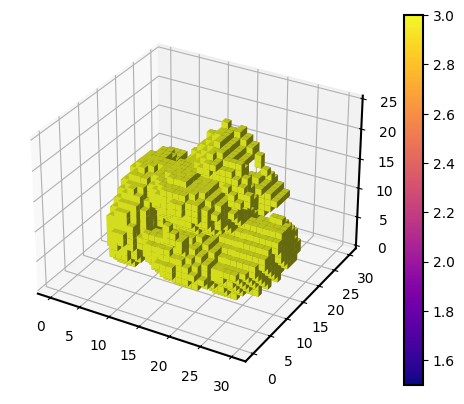

In [14]:
e = mat["eps_map"]

#plot_volume(mat["eps_map"])
plot_volume(e)

In [15]:
mat["C"] = np.float16(mat["C"]) # this zeroes out the matrix
mat["eps_map"] = np.float16(mat["eps_map"])

In [16]:
def process_eps(f, save_path, reduction_factor):
    raw = scipy.io.loadmat(raw_data_path + f)
    raw['eps_map'][sensor] = 1 # convert sensor to air
    #raw['eps_map'] = raw['eps_map'][2:-2, 2:-2, 7:-7]
    raw['eps_map'] = raw['eps_map'][::reduction_factor, ::reduction_factor, ::reduction_factor] # downsample
    np.save(save_path+f[:-4], raw['eps_map'], allow_pickle=False, fix_imports=False)

In [17]:
def process_eps_2d(f, save_path, reduction_factor=1):
    raw = scipy.io.loadmat(raw_data_path + f)
    raw['eps_map'][sensor] = 1 # convert sensor to air
    #raw['eps_map'] = raw['eps_map'][2:-2, 2:-2, 7:-7]
    raw['eps_map'] = raw['eps_map'][::reduction_factor, ::reduction_factor, 31] # downsample
    np.save(save_path+f[:-4], raw['eps_map'], allow_pickle=False, fix_imports=False)

In [18]:
def process_C(f, save_path):
    raw = scipy.io.loadmat(raw_data_path + f)
    raw['C'] = np.delete(raw['C'], repeating_indexes)
    raw['C'] = (raw['C'] - empty_meas['C']) / (full_meas['C'] - empty_meas['C']) # normalize
    np.save(save_path+f[:-4],  raw['C'], allow_pickle=False, fix_imports=False)

In [19]:
processed_path_eps = "../dataset/data_processed_eps_32/"
def process_eps_helper(f):
    process_eps(f, processed_path_eps, 2)

with concurrent.futures.ThreadPoolExecutor() as executor:
    list(tqdm(executor.map(process_eps_helper, iter(files)), total=len(files)))

C:\Users\Mati\AppData\Local\Temp\ipykernel_13964\3822591577.py:6: DeprecationWarning: The 'fix_imports' flag is deprecated and has no effect. (Deprecated in NumPy 2.1)
  np.save(save_path+f[:-4], raw['eps_map'], allow_pickle=False, fix_imports=False)
100%|██████████| 252550/252550 [04:12<00:00, 998.63it/s] 


In [32]:
processed_path_C = "../dataset/data_processed_C/"
def process_C_helper(f):
    process_C(f, processed_path_C)

with concurrent.futures.ThreadPoolExecutor() as executor:
    list(tqdm(executor.map(process_C_helper, iter(files)), total=len(files)))

C:\Users\Mati\AppData\Local\Temp\ipykernel_32692\4046606832.py:5: DeprecationWarning: The 'fix_imports' flag is deprecated and has no effect. (Deprecated in NumPy 2.1)
  np.save(save_path+f[:-4],  raw['C'], allow_pickle=False, fix_imports=False)
100%|██████████| 252550/252550 [04:41<00:00, 898.00it/s] 


In [33]:
# make csv with all files names
processed_path_eps = "../dataset/data_processed_eps/"
processed_path_C = "../dataset/data_processed_C/"

files_processed_eps = [f for f in os.listdir(processed_path_eps)]
files_processed_C = [f for f in os.listdir(processed_path_C)]

train_split = int(len(files_processed_C) * 0.7)
valid_split = int(len(files_processed_C) * 0.85)

In [34]:
csv_processed_filename_train = "ect_data_train.csv"
csv_processed_filename_test = "ect_data_test.csv"
csv_processed_filename_eval = "ect_data_eval.csv"
with open(csv_processed_filename_train, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['C File Name', 'Eps File Name'])
        for eps_file_name, c_file_name in zip(files_processed_eps[:train_split], files_processed_C[:train_split]):
            writer.writerow([processed_path_C + c_file_name, processed_path_eps + eps_file_name])
with open(csv_processed_filename_test, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['C File Name', 'Eps File Name'])
        for eps_file_name, c_file_name in zip(files_processed_eps[train_split:valid_split], files_processed_C[train_split:valid_split]):
            writer.writerow([processed_path_C + c_file_name, processed_path_eps + eps_file_name])
with open(csv_processed_filename_eval, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['C File Name', 'Eps File Name'])
        for eps_file_name, c_file_name in zip(files_processed_eps[valid_split:], files_processed_C[valid_split:]):
            writer.writerow([processed_path_C + c_file_name, processed_path_eps + eps_file_name])

In [25]:
csv_processed_filename_train = "test_data_eye.csv"

with open(csv_processed_filename_train, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['C File Name', 'Eps File Name'])
        for eps_file_name, c_file_name in zip(files_processed_eps, files_processed_C):
            writer.writerow([processed_path_C + c_file_name, processed_path_eps + eps_file_name])


In [17]:
# prep test data for matlab

# make csv with all files names
raw_files = [f for f in os.listdir(raw_data_path)]

train_split = int(len(raw_files) * 0.7)
valid_split = int(len(raw_files) * 0.85)

csv_processed_filename_train = "ect_raw_train.csv"
csv_processed_filename_test = "ect_raw_test.csv"
csv_processed_filename_eval = "ect_raw_eval.csv"

with open(csv_processed_filename_train, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['raw File Name'])
        for raw_file_name in raw_files[:train_split]:
            writer.writerow(['C:\\Users\\Mati\\Documents\\uczelnia\\magisterka\\nn\\data_raw\\' + raw_file_name])
with open(csv_processed_filename_test, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['raw File Name'])
        for raw_file_name in raw_files[train_split:valid_split]:
            writer.writerow(['C:\\Users\\Mati\\Documents\\uczelnia\\magisterka\\nn\\data_raw\\' + raw_file_name])
with open(csv_processed_filename_eval, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['raw File Name'])
        for raw_file_name in raw_files[valid_split:]:
            writer.writerow(['C:\\Users\\Mati\\Documents\\uczelnia\\magisterka\\nn\\data_raw\\' + raw_file_name])